In [1]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#import ipl_dataset from csv file into pandas
df=pd.read_csv(r"D:\IPL Dataset-1.csv")

In [3]:
import  matplotlib.pyplot as plt

In [4]:
#About ipl_dataset
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,,,0,19
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19


In [6]:
#ipl season 
df["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

In [7]:
#Total number of run in ipl 2008-20
df['run'].sum()

254126

In [8]:
#
df.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

<Axes: xlabel='count', ylabel='season'>

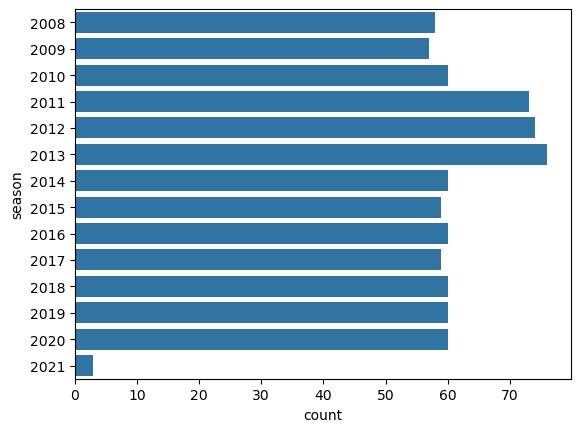

In [9]:
#number of matches played in season 
import  matplotlib as plt
# plt.figure(figsize=(10,8))
data=df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
# plt.xlabel('matches played')
# plt.ylabel('season')
# plt.show()

venue
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Name: count, dtype: int64

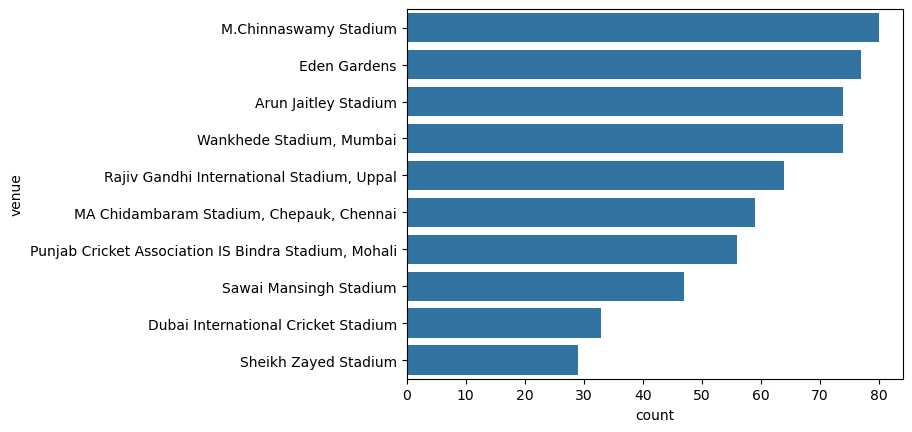

In [10]:
# most ipl matches playes in a vanue
a=df.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts().head(10)
sns.barplot(y=a.index,x=a,orient='h')
a

<Axes: xlabel='count', ylabel='bowling_team'>

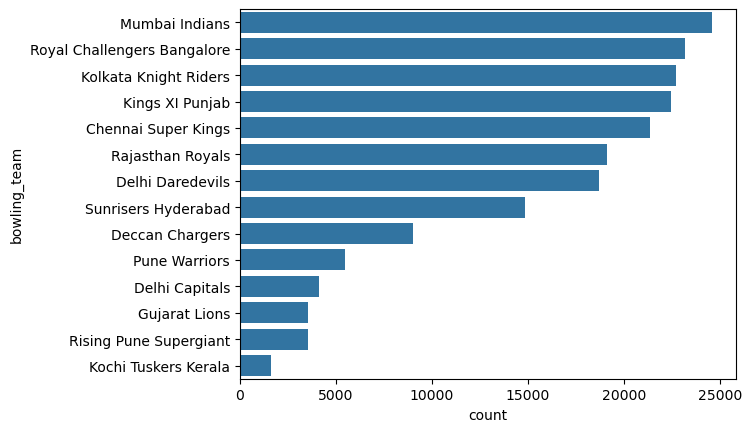

In [14]:
# most ipl matches played by each team 
data=df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
# plt.xlabels('Matches')
# plt.ylabels('Teams')
# plt.show()

In [25]:
# most run scored by ipl teams
df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

<Axes: xlabel='runs_off_bat', ylabel='striker'>

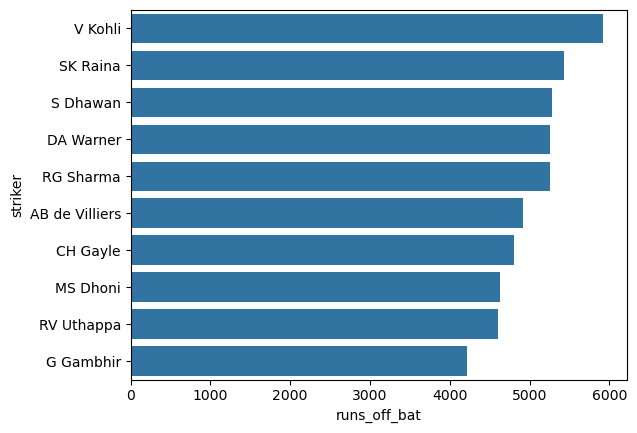

In [15]:
# most ipl runs  by a batsman
# plt.figure(figsize=(10,5))
dataa=df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=dataa.index,x=dataa,orient='h')
# plt.xlabel('Runs')
# plt.ylabel('Batsman')
# plt.show()

In [28]:
# average runs by teams in power_play 
df[df['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

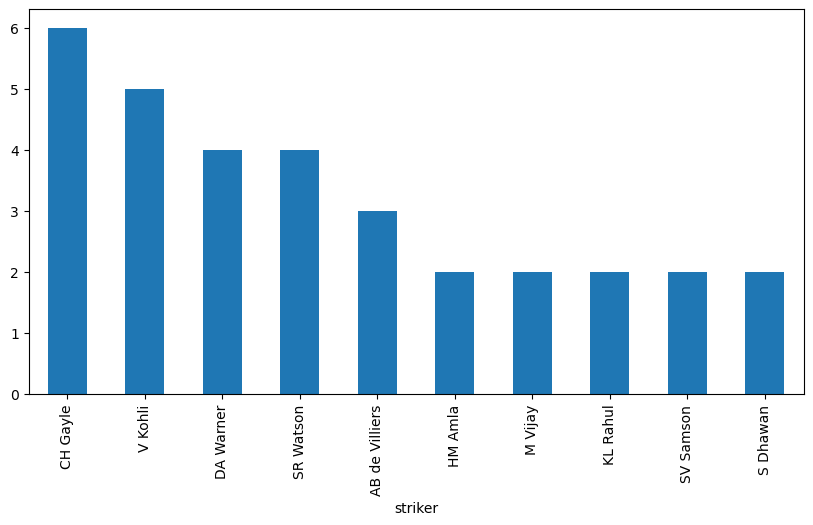

In [30]:
# most ipl century by a player

runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
l=runs[runs>=100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
l.plot.bar(figsize=(10,5))
l
# plt.xlabel('Batsman')
# plt.ylabel('Centuries')
# plt.show()

<Axes: xlabel='runs_off_bat', ylabel='striker'>

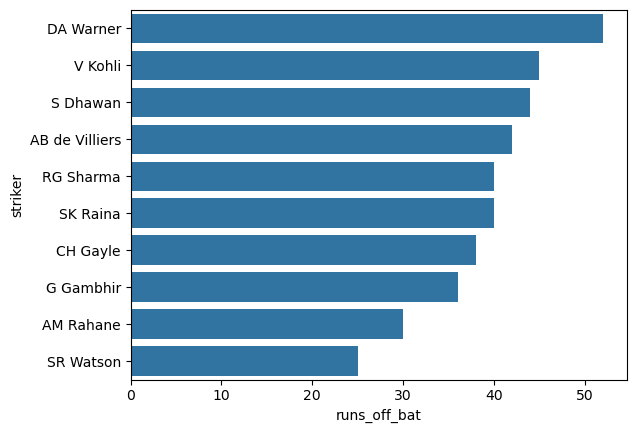

In [34]:
#most ipl fifty by a player
# plt.figure(figsize=(10,8))
runs=df.groupby(['striker','start_date'])['runs_off_bat'].sum()
data=runs[runs>=50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

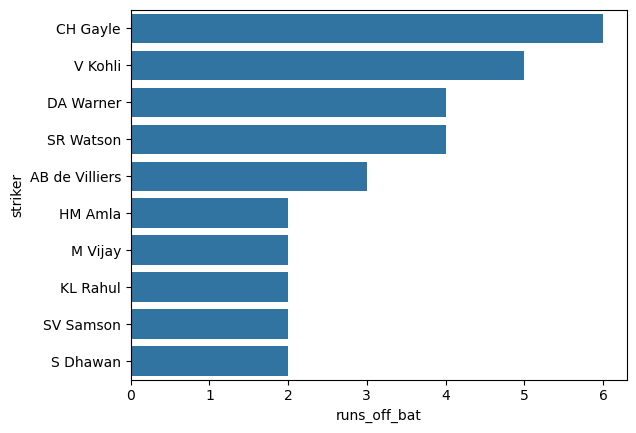

In [39]:
#most ipl century by a player
# plt.figure(figsize=(10,8))
runs=df.groupby(['striker','start_date'])['runs_off_bat'].sum()
data=runs[runs>=100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

sns.barplot(y=data.index,x=data,orient='h')
data

In [49]:
#most ipl sixes by a batsman
df[df['runs_off_bat'] == 6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10]

striker
CH Gayle          17
BB McCullum       13
CH Gayle          13
CH Gayle          12
AB de Villiers    12
M Vijay           11
CH Gayle          11
AD Russell        11
ST Jayasuriya     11
SS Iyer           10
Name: season, dtype: int64

In [47]:
#most ipl fours boundary by a batsman
df[df['runs_off_bat'] == 4].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10]

striker
PC Valthaty       19
AB de Villiers    19
MJ Lumb           16
AM Rahane         16
GJ Maxwell        15
M Vijay           15
RR Pant           15
Q de Kock         15
SS Iyer           15
HM Amla           14
Name: season, dtype: int64

In [50]:
df[df['runs_off_bat'] == 4]['striker'].value_counts()[:10]

striker
S Dhawan          601
DA Warner         510
V Kohli           510
SK Raina          496
G Gambhir         492
RG Sharma         459
RV Uthappa        454
AM Rahane         416
AB de Villiers    395
CH Gayle          387
Name: count, dtype: int64

In [53]:
#most ipl runs in an ipl season by player
df.groupby(['striker',"season"])["runs_off_bat"].sum().sort_values(ascending=False)[:5]


striker        season
V Kohli        2016      973
DA Warner      2016      848
KS Williamson  2018      735
MEK Hussey     2013      733
CH Gayle       2012      733
Name: runs_off_bat, dtype: int64

season
2018    872
2019    786
2020    736
2012    733
2014    715
2017    706
2015    692
2013    681
2011    639
2016    639
2008    623
2010    587
2009    508
2021     43
Name: match_id, dtype: int64

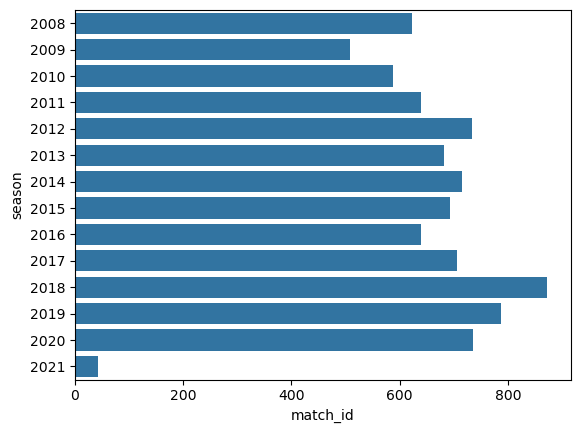

In [56]:
#number of sixes in an ipl season
data=df[df['runs_off_bat']==6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
data

In [65]:
# highest total by an ipl team
df.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Royal Challengers Bangalore    235
Kolkata Knight Riders          232
Kings XI Punjab                232
Delhi Daredevils               231
Sunrisers Hyderabad            231
Name: run, dtype: int64

In [66]:
# highest score in ipl by a player 
df.groupby(['striker','start_date'])['runs_off_bat'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

striker
CH Gayle          175
BB McCullum       158
AB de Villiers    133
KL Rahul          132
AB de Villiers    129
CH Gayle          128
RR Pant           128
M Vijay           127
DA Warner         126
V Sehwag          122
Name: runs_off_bat, dtype: int64

In [67]:
# most run conceded by a bowler in an inning
df.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

bowler
Basil Thampi        70
Sandeep Sharma      66
Mujeeb Ur Rahman    66
I Sharma            66
PJ Cummins          65
UT Yadav            65
AS Rajpoot          64
S Kaul              64
AB Dinda            63
TA Boult            63
Name: run, dtype: int64

bowler
Harbhajan Singh    1247
R Ashwin           1174
B Kumar            1165
SL Malinga         1144
PP Chawla          1137
A Mishra           1129
SP Narine          1100
P Kumar            1075
DW Steyn           1019
UT Yadav            955
Name: match_id, dtype: int64

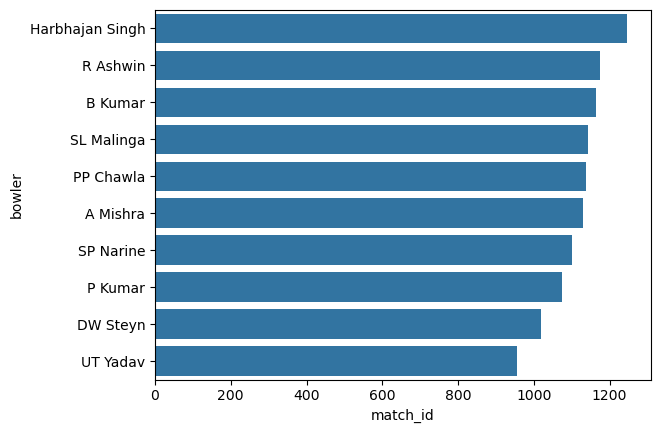

In [69]:
#most dot balls by bowler
data=df[df['run']==0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
# plt.xlabel('Dot balls')
# plt.ylabel('Bowler')
# plt.show()
data